In [1]:
import os
import pandas as pd
import scipy.spatial as spatial

In [2]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings("ignore")

In [5]:
artist_features = pd.read_csv('../../resources/artist_features.csv')

In [6]:
artist_features.head()

artist  acousticness  danceability  energy  instrumentalness  key  \
0  Fleetwood Mac      0.247420        0.6410  0.5482          0.050382  5.6   
1   Taylor Swift      0.157283        0.6389  0.6038          0.000004  3.6   
2          BICEP      0.052807        0.7081  0.7670          0.738300  6.3   
3   Wu-Tang Clan      0.184912        0.8061  0.5444          0.002502  6.7   
4       Gorillaz      0.064508        0.6583  0.7520          0.078575  5.7   

   liveness  loudness  mode  speechiness     tempo  valence  
0   0.09729  -11.6614   0.8      0.03327  136.1036   0.7515  
1   0.11560   -6.6028   0.9      0.11499  119.4981   0.5788  
2   0.11036   -7.3298   0.3      0.06517  125.5194   0.3627  
3   0.34842   -9.7264   0.6      0.34940  107.9929   0.5193  
4   0.28476   -6.5293   0.6      0.09840  133.6651   0.7054

In [12]:
artist_data = artist_features.drop('artist', axis=1)

Text(0.5, 1.0, 'acousticness vs speechiness')

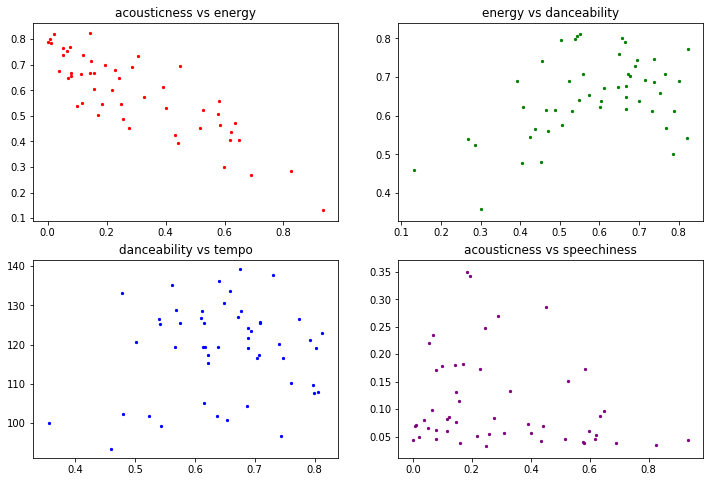

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax[0][0].scatter(artist_features['acousticness'], artist_features['energy'], s=5, color='red')
ax[0][0].set_title('acousticness vs energy')
ax[0][1].scatter(artist_features['energy'], artist_features['danceability'], s=5, color='green')
ax[0][1].set_title('energy vs danceability')
ax[1][0].scatter(artist_features['danceability'], artist_features['tempo'], s=5, color='blue')
ax[1][0].set_title('danceability vs tempo')
ax[1][1].scatter(artist_features['acousticness'], artist_features['speechiness'], s=5, color='purple')
ax[1][1].set_title('acousticness vs speechiness')

In [23]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(artist_data)
centroids = kmeans_model.cluster_centers_
artist_features['cluster'] = kmeans_model.labels_

In [24]:
for i in range(len(centroids)):
    print(len(artist_features[artist_features['cluster'] == i]))

18
14
19


In [49]:
# Now lets take the two tracks closest to each centroid and use THESE as our recommendations
tree = spatial.KDTree(artist_data)
columns = ["acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", 
           "mode", "speechiness", "tempo", "valence"]
initial_artists = dict()
for i in range(len(centroids)):
    nearest_neighbours = tree.query(centroids[i], k=2)
    index_1 = nearest_neighbours[1][0]
    index_2 = nearest_neighbours[1][1]
    initial_artists[artist_features.iloc[index_1]['artist']] = artist_features.iloc[index_1]
    initial_artists[artist_features.iloc[index_2]['artist']] = artist_features.iloc[index_2]

In [50]:
initial_artists

{'Prefab Sprout': artist              Prefab Sprout
 acousticness             0.159061
 danceability               0.6169
 energy                     0.6671
 instrumentalness        0.0203972
 key                             5
 liveness                  0.10458
 loudness                   -8.654
 mode                          0.3
 speechiness               0.03912
 tempo                     119.394
 valence                    0.6188
 cluster                         0
 Name: 44, dtype: object,
 'Rex Orange County': artist              Rex Orange County
 acousticness                   0.6218
 danceability                   0.5664
 energy                         0.4366
 instrumentalness          0.000895256
 key                               5.4
 liveness                       0.1869
 loudness                      -8.4997
 mode                              0.9
 speechiness                   0.05343
 tempo                         119.319
 valence                        0.3515
 cluster     

In [ ]:
def mock_user_input(initial_artists_ratings, ):
    # Lets give a rating of [1,4,2,9,3,4] for our 6 initial artists
    ratings = [1,4,2,9,3,4]
    index = ["acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness",
             "mode", "speechiness", "tempo", "valence"]
    user_preferences = pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=self.index)
    for i in range(len(ratings)):
        user_preferences = initial_artists.add(user_preferences, fill_value=0)